# URL of the data

In [108]:
url = 'https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data'

In [109]:
# converting the url to raw url for reading
url = url.replace('github.com','raw.githubusercontent.com').replace('/blob/','/')

# Importing important libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

%matplotlib inline

In [111]:
#reading the csv file from url
df=pd.read_csv(url)

In [112]:
#viewing the data
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [113]:
#checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [114]:
#looking for null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### we can clearly see that there are null values present in MDVP:PPQ Jitter:DDP so we will fill it with the mean values

In [115]:
df['MDVP:PPQ'].fillna(df['MDVP:PPQ'].mean(),inplace=True)
df['Jitter:DDP'].fillna(df['Jitter:DDP'].mean(),inplace=True)

In [116]:
# again checking for null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [117]:
# checking the ratio of people who have epilepsy to who dont have
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

# Visualization

<AxesSubplot:xlabel='status', ylabel='count'>

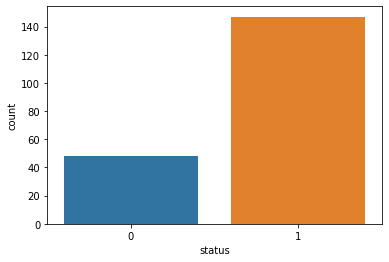

In [118]:
sns.countplot(x=df['status'])

# Scaling

In [119]:
#we need to scale the data we will use MinMaxScaler()
scale=MinMaxScaler()

In [120]:
# seperating target column before scaling
target=df['status']

In [121]:
# droping the name and status column
df.drop(['name','status'],axis=1,inplace=True)

In [122]:
# Fitting the data to scaler
scale.fit(df)

MinMaxScaler()

In [123]:
# Transforming the data to scaled
new_df = scale.transform(df)

In [124]:
# defining new dataframe with scaled values
df_new = pd.DataFrame(new_df,columns=scale.feature_names_in_)

In [125]:
df_new

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.155142,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.088828,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.072594,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.066544,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


In [126]:
#adding the target column for feature scaling purpose
df_new['status']=target

In [127]:
df_new

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310,1
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326,1
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682,1
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949,1
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318,0
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558,0
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580,0
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137,0


In [128]:
#statistics of the dataset
df_new.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.383623,0.193841,0.292748,0.144233,0.146083,0.126513,0.136539,0.126704,0.184126,0.162080,...,0.214101,0.077019,0.546410,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549,0.753846
std,0.240959,0.186761,0.250564,0.154007,0.137636,0.142956,0.147420,0.142906,0.172147,0.160129,...,0.195527,0.128652,0.179865,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649,0.431878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170220,0.066786,0.108323,0.056544,0.051383,0.047206,0.051983,0.047279,0.063584,0.052177,...,0.071222,0.016790,0.437170,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433,1.000000
50%,0.351961,0.150411,0.223606,0.103558,0.090909,0.087669,0.098071,0.087494,0.122604,0.111750,...,0.158685,0.035045,0.554499,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661,1.000000
75%,0.549775,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,...,0.302703,0.079543,0.676034,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature selection

## Heatmap

<AxesSubplot:>

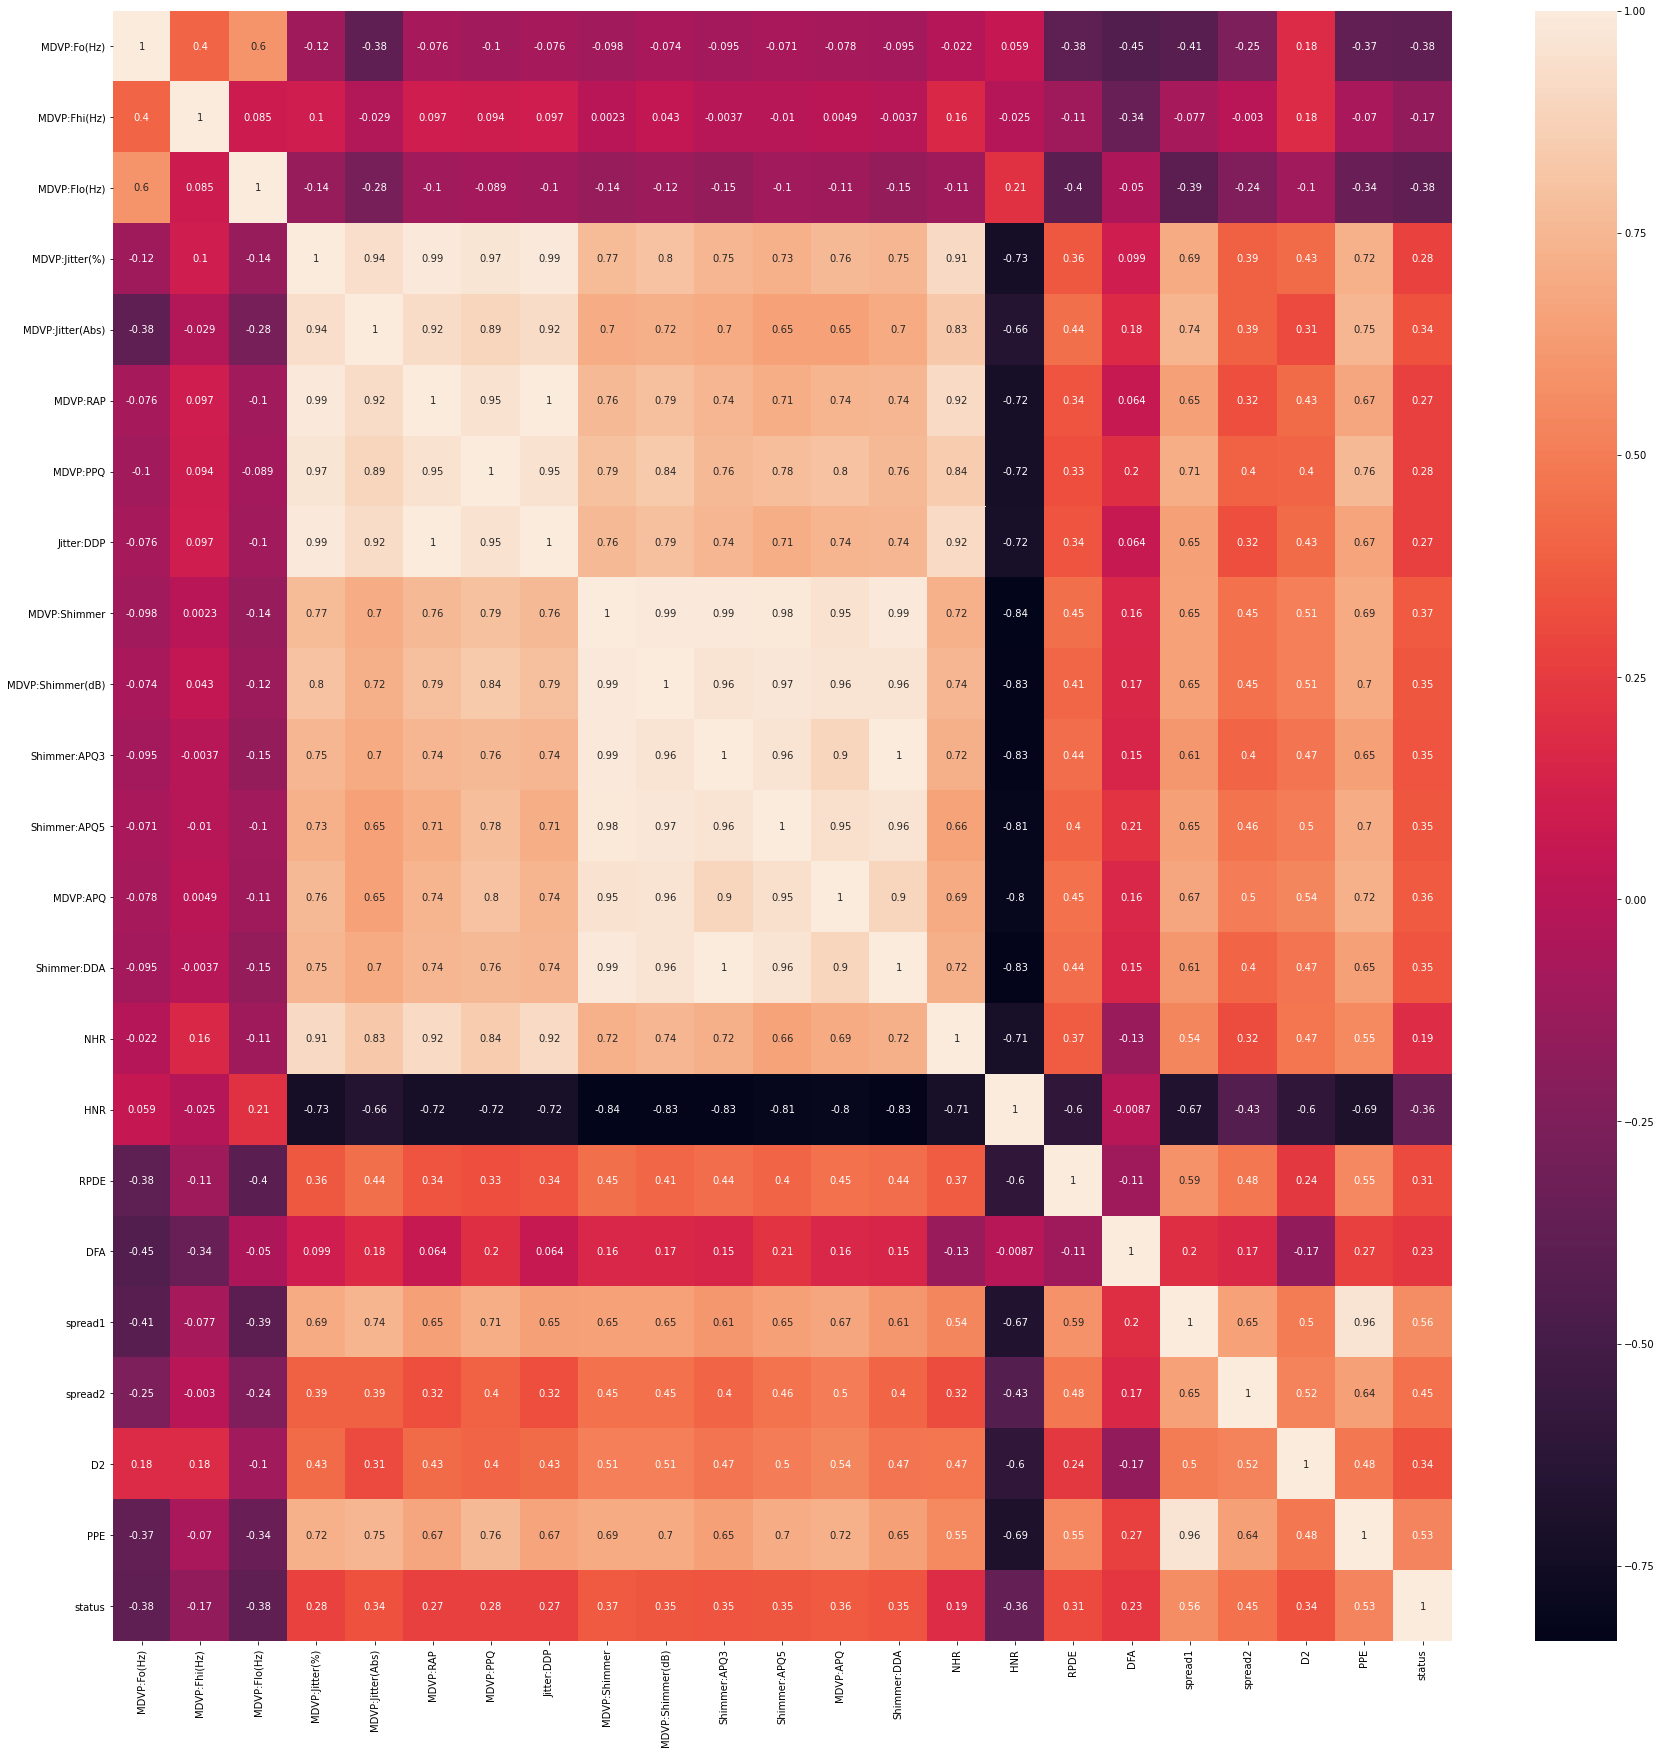

In [129]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_new.corr(),annot=True)

### corelation is almost the same for all features so we need to cosider all features

In [130]:
#splitting the data into dependent and independent variable
X=df_new.drop(['status'],axis=1)
y=df_new['status']

In [131]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [132]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Modeling

In [133]:
# Splitting the data set into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## Decision Tree Classifier

In [134]:
dc=DecisionTreeClassifier(criterion="entropy",splitter="random")

In [135]:
#fitting
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [136]:
#prediction
y_pred=dc.predict(X_test)

In [137]:
#scores
print('Scores :-\n')
print('Train:  ',dc.score(X_train,y_train))
print('Test:  ',dc.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred))

Scores :-

Train:   1.0
Test:   0.8775510204081632
Accuracy:   0.8775510204081632


In [138]:
# Confusion matrix for the test data
cm = confusion_matrix(y_test,y_pred)

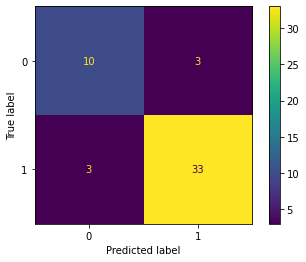

In [139]:
ConfusionMatrixDisplay(cm).plot()

# Logistic Regression

In [140]:
lr=LogisticRegression()

In [141]:
#fitting
lr.fit(X_train,y_train)

LogisticRegression()

In [142]:
#prediction
y_pred1=lr.predict(X_test)

In [143]:
#scores
print('Scores :-\n')
print('Train:  ',lr.score(X_train,y_train))
print('Test:  ',lr.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred1))

Scores :-

Train:   0.8698630136986302
Test:   0.8367346938775511
Accuracy:   0.8367346938775511


In [144]:
# Confusion matrix for the test data
cm1 = confusion_matrix(y_test,y_pred1)

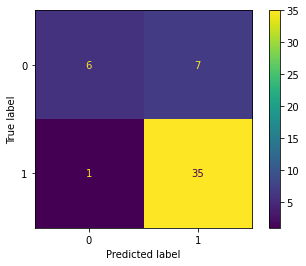

In [145]:
ConfusionMatrixDisplay(cm1).plot()

# Bagging Classifier

In [146]:
bg=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)

In [147]:
#fitting
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [148]:
#prediction
y_pred2=bg.predict(X_test)

In [149]:
#scores
print('Scores :-\n')
print('Train:  ',bg.score(X_train,y_train))
print('Test:  ',bg.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred2))

Scores :-

Train:   1.0
Test:   0.9183673469387755
Accuracy:   0.9183673469387755


In [150]:
# Confusion matrix for the test data
cm2 = confusion_matrix(y_test,y_pred2)

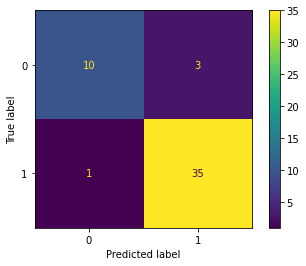

In [151]:
ConfusionMatrixDisplay(cm2).plot()

# SVM

In [152]:
sv=SVC(C=5)

In [153]:
#fitting
sv.fit(X_train,y_train)

SVC(C=5)

In [154]:
#prediction
y_pred3=sv.predict(X_test)

In [155]:
#scores
print('Scores :-\n')
print('Train:  ',sv.score(X_train,y_train))
print('Test:  ',sv.score(X_test,y_test))
print('Accuracy:  ',accuracy_score(y_test,y_pred3))

Scores :-

Train:   0.9178082191780822
Test:   0.8775510204081632
Accuracy:   0.8775510204081632


In [156]:
# Confusion matrix for the test data
cm3 = confusion_matrix(y_test,y_pred3)

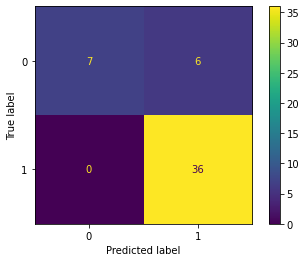

In [157]:
ConfusionMatrixDisplay(cm3).plot()